        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datum        9334 non-null   object 
 1   Warengruppe  9334 non-null   int64  
 2   Umsatz       9334 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 218.9+ KB
None
        Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0  2012-01-01          NaN     NaN         8.0      9.8250   
1  2012-01-02          NaN     NaN         7.0      7.4375   
2  2012-01-03          NaN     NaN         8.0      5.5375   
3  2012-01-04          NaN     NaN         4.0      5.6875   
4  2012-01-05          NaN     NaN         6.0      5.3000   

   Windg

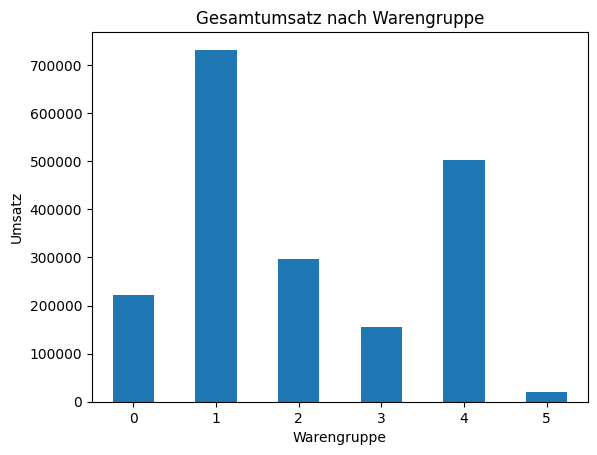

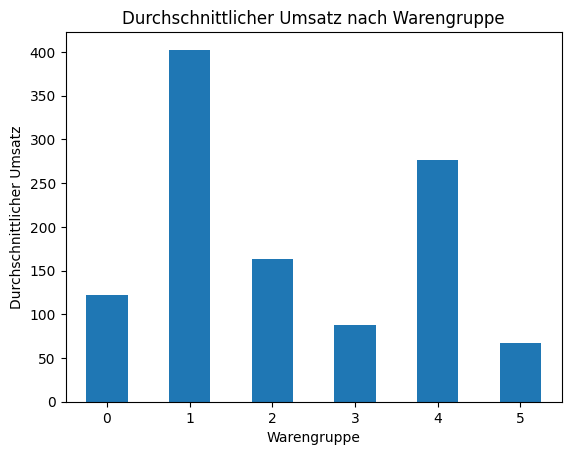

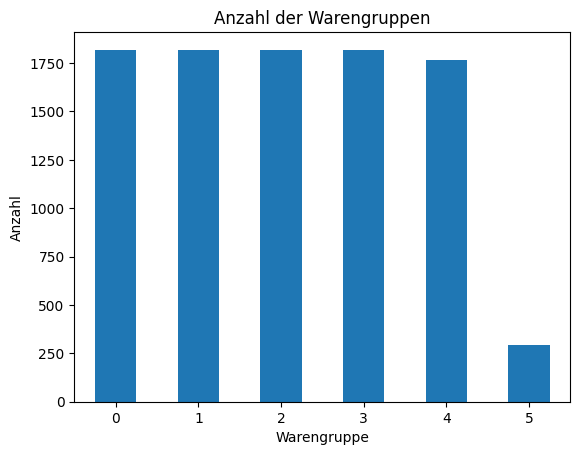

Korrelationskoeffizient zwischen Umsatz und Temperatur: 0.22293543679239128


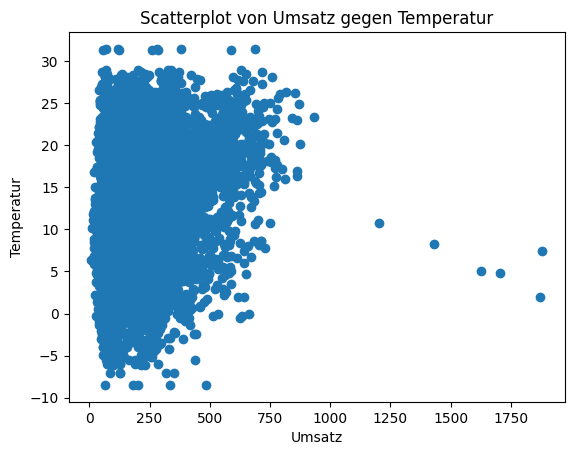

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

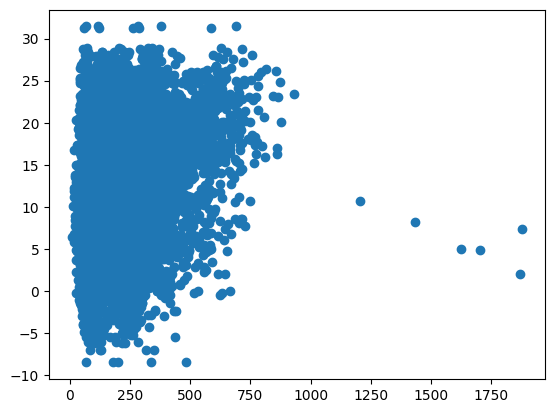

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Datensatz einlesen
umsatzdaten = pd.read_csv('0_DataPreparation/umsatzdaten_gekuerzt.csv')
wetter = pd.read_csv('0_DataPreparation/wetter.csv')
kiwo = pd.read_csv('0_DataPreparation/kiwo.csv')

# Umsatzdaten anzeigen
print(umsatzdaten.head())
print(umsatzdaten.info())

# Daten zusammenführen als outer join
umsatzdaten = pd.merge(umsatzdaten, wetter, on='Datum', how='outer')
umsatzdaten = pd.merge(umsatzdaten, kiwo, on='Datum', how='outer')

# Umsatzdaten anzeigen
print(umsatzdaten.head())
print(umsatzdaten.info())

# Deskriptive Statistik für Umsatzdaten
print(umsatzdaten.describe())
print(umsatzdaten.isnull())


# Umsatzdaten visualisieren mit Warengruppe auf X-Achse und Umsatz auf Y-Achse
umsatzdaten.groupby('Warengruppe')['Umsatz'].sum().plot(kind='bar')
plt.xticks(rotation=0)  # X-Achsenbeschriftungen aufrecht anzeigen
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))  # Formatierung der Warengruppen ohne Nachkommastelle
plt.xlabel('Warengruppe')
plt.ylabel('Umsatz')
plt.title('Gesamtumsatz nach Warengruppe')
plt.show()

# Umsatzdaten visualisieren mit Warengruppe auf X-Achse und durchschnittlichem Umsatz auf Y-Achse
umsatzdaten.groupby('Warengruppe')['Umsatz'].mean().plot(kind='bar')
plt.xticks(rotation=0)  # X-Achsenbeschriftungen aufrecht anzeigen
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))  # Formatierung der Warengruppen ohne Nachkommastelle
plt.xlabel('Warengruppe')
plt.ylabel('Durchschnittlicher Umsatz')
plt.title('Durchschnittlicher Umsatz nach Warengruppe')
plt.show()

# Warengruppen visualisieren
umsatzdaten['Warengruppe'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)  # X-Achsenbeschriftungen aufrecht anzeigen
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))  # Formatierung der Warengruppen ohne Nachkommastelle
plt.xlabel('Warengruppe')
plt.ylabel('Anzahl')
plt.title('Anzahl der Warengruppen')
plt.show()

# Korrelationskoeffizient zwischen Umsatz und Temperatur berechnen
korrelation = umsatzdaten['Umsatz'].corr(umsatzdaten['Temperatur'])

print("Korrelationskoeffizient zwischen Umsatz und Temperatur:", korrelation)

# Scatterplot von Umsatz gegen Temperatur
plt.scatter(umsatzdaten['Umsatz'], umsatzdaten['Temperatur'])
plt.xlabel('Umsatz')
plt.ylabel('Temperatur')
plt.title('Scatterplot von Umsatz gegen Temperatur')
plt.show()

import numpy as np

# Scatterplot von Umsatz gegen Temperatur
plt.scatter(umsatzdaten['Umsatz'], umsatzdaten['Temperatur'], label='Datenpunkte')

# Lineare Regression durchführen
coefficients = np.polyfit(umsatzdaten['Umsatz'], umsatzdaten['Temperatur'], 1)
polynomial = np.poly1d(coefficients)
x_values = np.linspace(umsatzdaten['Umsatz'].min(), umsatzdaten['Umsatz'].max(), 100)
plt.plot(x_values, polynomial(x_values), color='red', label='Regressionsgerade')

plt.xlabel('Umsatz')
plt.ylabel('Temperatur')
plt.title('Scatterplot von Umsatz gegen Temperatur mit Regressionsgerade')
plt.legend()
plt.show()




Idee für das feature Engineering der Temp.-Variable --> Kategorien bilden und/oder Abweichung vom Durchschnittswert in diesem Monat